In [2]:
import torch
from torch import nn as nn

import cv2 as cv
import mediapipe as mp

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from IPython.display import display, Image
from sklearn.preprocessing import MinMaxScaler, Normalizer

from tqdm import tqdm
import os
import sys

import json
from glob import glob
from collections import OrderedDict


In [3]:
# This stops the absl logs in mediapipe from appearing in the markdown
sys.stderr = sys.__stderr__

In [4]:
import cv2
import mediapipe as mp

# Import the necessary drawing utilities and hands module from the MediaPipe library
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

def capture_image(camera, draw_landmarks=False):
    """
    This function opens the camera, displays the video feed, and captures an image when the 'c' key is pressed.
    It also uses the MediaPipe library to track the hand while the camera is open.

    Parameters:
    camera (cv2.VideoCapture): The camera object returned by cv2.VideoCapture(0).
    """


    # Initialize the Hands class from the MediaPipe library with a minimum detection confidence and tracking confidence
    with mp_hands.Hands(
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5) as hands:

        while True:
            # Read a frame from the camera
            ret, frame = camera.read()
            if not ret:
                break

            # Convert the frame from BGR (OpenCV's default color format) to RGB (MediaPipe's required color format)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Process the frame using the Hands class to detect and track the hand
            results = hands.process(frame)            

            # Convert the frame back to BGR for displaying with OpenCV
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

            # If draw_landmarks is true, draw landmarks on the produced image
            if draw_landmarks:

                # If any hands are detected, draw the landmarks on the frame
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        mp_drawing.draw_landmarks(
                            frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Display the frame in a window named 'Camera'
            cv2.imshow('Camera', frame)

            # Wait for a key press and check if it's the 'c' key
            key = cv2.waitKey(1) & 0xFF

            if key == ord('c'):
                # If the 'c' key is pressed, save the current frame as an image named 'captured_image.jpg'
                cv2.imwrite('captured_image.jpg', frame)
                print("Image captured!")
                break

    # Release the camera and close all OpenCV windows
    camera.release()
    cv2.destroyAllWindows()


# If this script is run directly (i.e., not imported), open the default camera (index 0) and call the capture_image function
if __name__ == '__main__':
    # sys.stdout = open(os.devnull, 'w')
    camera = cv2.VideoCapture(0)
    capture_image(camera)


    # sys.stdout = sys.__stdout__

In [5]:
import cv2
import mediapipe as mp
import pandas as pd
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

def process_image(image_path, show=False):
    """
    This function takes in an image, applies the MediaPipe hand model, and stores the landmark x, y, and z positions
    in a pandas DataFrame. It also displays the original image and the image with the detected landmarks drawn on it
    using a plot.

    Parameters:
    image_path (str): The path to the image file.
    show (bool): If true, displays the image before and after the mediapipe model is applied.

    Returns:
    pandas.DataFrame: A DataFrame containing the landmark x, y, and z positions.
    """

    # Load the image
    image = cv2.imread(image_path)


    # Initialize the Hands class from the MediaPipe library with a minimum detection confidence and tracking confidence
    with mp_hands.Hands(
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5) as hands:

        # Convert the image from BGR (OpenCV's default color format) to RGB (MediaPipe's required color format)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image using the Hands class to detect and track the hand
        results = hands.process(image_rgb)

        # If any hands are detected, extract the landmarks and draw them on the image
        if results.multi_hand_landmarks:
            landmarks = results.multi_hand_landmarks[0]

            # Create a list to store the landmark positions
            landmark_positions = []

            # Iterate over the landmarks and append their x, y, and z positions to the list
            for landmark in landmarks.landmark:
                landmark_positions.append([landmark.x, landmark.y, landmark.z])

            # Create a DataFrame from the landmark positions
            df = pd.DataFrame(landmark_positions, columns=['x', 'y', 'z'])
            # df['landmark'] = df.index
            # df['label'] = image_path.split("/")[-2]


            if show:

                # Draw the landmarks on the image
                image_with_landmarks = image.copy()
                mp_drawing.draw_landmarks(
                    image_with_landmarks,
                    landmarks,
                    mp_hands.HAND_CONNECTIONS)

                # Display the original image and the image with the detected landmarks using a plot
                fig, axs = plt.subplots(1, 2, figsize=(10, 5))
                axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                axs[0].set_title('Original Image')
                axs[0].axis('off')
                axs[1].imshow(cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB))
                axs[1].set_title('Image with Landmarks')
                axs[1].axis('off')
                plt.show()
            
            data_dict = df.to_dict()
            # data_dict['label'] = image_path.split("/")[-2]
            # data_dict = dict(sorted(data_dict))
            # data_dict['image'] = image_path.split("/")[-1]

            # return json.dumps(data_dict, indent=4, sort_keys=True)
            return data_dict

        else:
            # print("\nNo hands detected in the image.")
            raise Exception("No hands detected in the image.")
            pass

[ WARN:0@0.937] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@0.938] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range
I0000 00:00:1723304965.832118    4524 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1723304965.833689    5185 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: AMD Radeon RX 6700 XT (navi22, LLVM 15.0.7, DRM 3.54, 6.5.0-45-generic)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1723304965.885038    4524 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1723304965.885672    5204 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: AMD Radeon RX 6700 XT (navi22, LLVM 15.0.7, DRM 3.54, 6.5.0-45-generic)
I0000 00:00:1723304966.120950    4524 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 

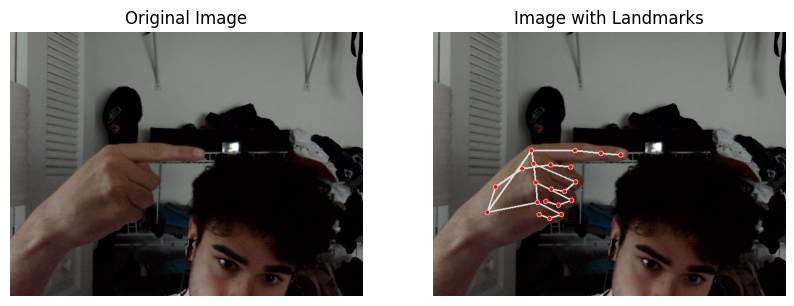

{'x': {0: 0.1533956378698349,
  1: 0.17713502049446106,
  2: 0.25240379571914673,
  3: 0.3343442678451538,
  4: 0.38969701528549194,
  5: 0.2795594334602356,
  6: 0.4020604193210602,
  7: 0.47500282526016235,
  8: 0.5325548052787781,
  9: 0.28466829657554626,
  10: 0.40450936555862427,
  11: 0.37193137407302856,
  12: 0.3350968062877655,
  13: 0.29128119349479675,
  14: 0.39284491539001465,
  15: 0.35517993569374084,
  16: 0.31889334321022034,
  17: 0.29574859142303467,
  18: 0.3631092309951782,
  19: 0.3307296931743622,
  20: 0.30125224590301514},
 'y': {0: 0.6851397752761841,
  1: 0.589154839515686,
  2: 0.5189325213432312,
  3: 0.5052527785301208,
  4: 0.514437198638916,
  5: 0.45108020305633545,
  6: 0.4519725441932678,
  7: 0.46131953597068787,
  8: 0.46870988607406616,
  9: 0.5007190108299255,
  10: 0.5705345273017883,
  11: 0.6058484315872192,
  12: 0.5962077379226685,
  13: 0.5718232989311218,
  14: 0.6378166079521179,
  15: 0.6582839488983154,
  16: 0.6429107785224915,
  17: 0

In [6]:
process_image('captured_image.jpg', True)




In [7]:
inp = {}
inp['0'] = process_image('captured_image.jpg')

json.dumps(inp)


'{"0": {"x": {"0": 0.1533956378698349, "1": 0.17713502049446106, "2": 0.25240379571914673, "3": 0.3343442678451538, "4": 0.38969701528549194, "5": 0.2795594334602356, "6": 0.4020604193210602, "7": 0.47500282526016235, "8": 0.5325548052787781, "9": 0.28466829657554626, "10": 0.40450936555862427, "11": 0.37193137407302856, "12": 0.3350968062877655, "13": 0.29128119349479675, "14": 0.39284491539001465, "15": 0.35517993569374084, "16": 0.31889334321022034, "17": 0.29574859142303467, "18": 0.3631092309951782, "19": 0.3307296931743622, "20": 0.30125224590301514}, "y": {"0": 0.6851397752761841, "1": 0.589154839515686, "2": 0.5189325213432312, "3": 0.5052527785301208, "4": 0.514437198638916, "5": 0.45108020305633545, "6": 0.4519725441932678, "7": 0.46131953597068787, "8": 0.46870988607406616, "9": 0.5007190108299255, "10": 0.5705345273017883, "11": 0.6058484315872192, "12": 0.5962077379226685, "13": 0.5718232989311218, "14": 0.6378166079521179, "15": 0.6582839488983154, "16": 0.642910778522491

In [8]:
df = pd.read_json(json.dumps(inp)).transpose()

In [9]:
def preprocess_column(series, scaler=MinMaxScaler()):

    # Expand dict into new DataFrame
    df = DataFrame(series.tolist())

    # Scale coordinates
    df = DataFrame(scaler.fit_transform(df))

    # Normalize coordinates
    normalizer = Normalizer()
    df = DataFrame(normalizer.fit_transform(df))

    df = DataFrame(Normalizer().fit_transform(DataFrame(MinMaxScaler().fit_transform(DataFrame(series.tolist()).transpose())).transpose()))

    # Renaming columns
    df.columns = [f"{series.name}{col}"for col in df.columns]

    return df

In [10]:
# DataFrame(MinMaxScaler().fit_transform(DataFrame(df['x'].tolist())))
# DataFrame(MinMaxScaler().fit_transform(DataFrame(df['x'].tolist()).transpose())).transpose()
# DataFrame(Normalizer().fit_transform(DataFrame(MinMaxScaler().fit_transform(DataFrame(df['x'].tolist()).transpose())).transpose()))


In [11]:
preprocessed_df = pd.concat([preprocess_column(df['x']), preprocess_column(df['y']), preprocess_column(df['z'])], axis=1)

preprocessed_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.0,0.025795,0.107582,0.196618,0.256764,0.137089,0.270198,0.349457,0.411993,0.14264,...,0.060549,0.091145,0.10756,0.025543,0.115752,0.183036,0.048706,0.045935,0.138876,0.20771


In [14]:
preprocessed_df.to_numpy().sum()

11.511807399874124

In [68]:
with open("test.json", 'w') as file:
    file.write(preprocessed_df.to_json())